<a href="https://colab.research.google.com/github/pandeyp84/python/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let's download the iris dataset from its weblink as followes:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
#Now, assign the column names to the dataset as follows
headernames = ['sepal-length','sepal-width', 'petal-length', 'petal-width','Class']

In [4]:
#Next we have to read the dataset using the pandas data frame as follows
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [5]:
#Now, observe the data
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Let's implement the very basic setp of data pre-processing
X=data.iloc[:,:-1].values
y=data.iloc[:,4].values

In [7]:
#Here, we are dividing the data into train and test split, with 70% of the training data and 30% of the testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 )

In [8]:
#Let's do data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#Now, we are training the model with the help of the SVM as follows:
#import support vector calssifier
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')

#fitting x samples and y classes
clf.fit(X_train, y_train)



SVC(kernel='linear')

In [10]:
#Now, we have to make the prediction, which can be done in the following ways:
y_pred=clf.predict(X_test)

In [11]:
#Let's print the result as follows:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

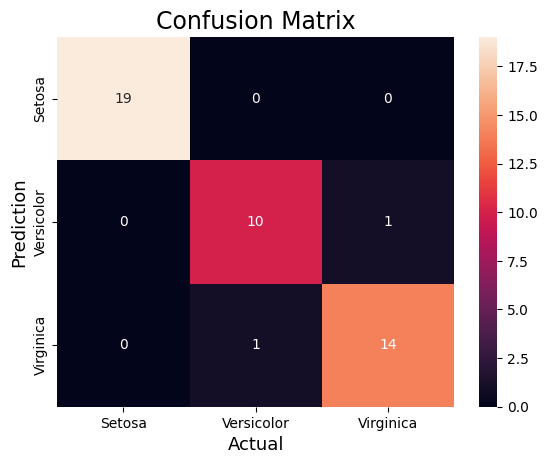

In [12]:
#Let's print the result as follows
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels = ['Setosa', 'Versicolor', 'Virginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Virginica'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [13]:
result1 = classification_report(y_test, y_pred)
print("Classification Report: ",)
print(result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy: ", result2)

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Accuracy:  0.9555555555555556
